# Business Case Study

In [158]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [159]:
df = pd.read_csv("Sample2.csv", encoding = 'latin-1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,08-11-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2.0,0.00,41.9136
1,2,CA-2016-152156,08-11-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3.0,0.00,219.5820
2,3,CA-2016-138688,12-06-2016,16-06-2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2.0,0.00,6.8714
3,4,US-2015-108966,11-10-2015,18-10-2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0,0.45,-383.0310
4,5,US-2015-108966,11-10-2015,18-10-2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2.0,0.20,2.5164


In [160]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,4542.000000,4541.000000,4541.000000,4541.000000,4541.000000,4541.000000
mean,2271.500000,54809.005726,233.114385,3.803788,0.156245,26.253348
std,1311.306791,31818.330215,652.495572,2.248258,0.205755,211.833891
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-3839.990400
25%,1136.250000,22304.000000,16.768000,2.000000,0.000000,1.759100
50%,2271.500000,55044.000000,52.960000,3.000000,0.200000,8.763000
75%,3406.750000,90004.000000,213.136000,5.000000,0.200000,28.857600
max,4542.000000,99207.000000,22638.480000,14.000000,0.800000,5039.985600


In [161]:
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], errors='coerce')

df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-08-11,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2.0,0.00,41.9136
1,2,CA-2016-152156,2016-08-11,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3.0,0.00,219.5820
2,3,CA-2016-138688,2016-12-06,NaT,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2.0,0.00,6.8714
3,4,US-2015-108966,2015-11-10,NaT,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0,0.45,-383.0310
4,5,US-2015-108966,2015-11-10,NaT,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2.0,0.20,2.5164


In [162]:
df['Order Month'] = df['Order Date'].dt.month
df['Order Month_Name'] = df['Order Date'].dt.month_name()
df['Order Year'] = df['Order Date'].dt.year
df['Order Day of Week'] = df['Order Date'].dt.dayofweek

In [163]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Month,Order Month_Name,Order Year,Order Day of Week
0,1,CA-2016-152156,2016-08-11,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Bookcases,Bush Somerset Collection Bookcase,261.9600,2.0,0.00,41.9136,8.0,August,2016.0,3.0
1,2,CA-2016-152156,2016-08-11,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3.0,0.00,219.5820,8.0,August,2016.0,3.0
2,3,CA-2016-138688,2016-12-06,NaT,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2.0,0.00,6.8714,12.0,December,2016.0,1.0
3,4,US-2015-108966,2015-11-10,NaT,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0,0.45,-383.0310,11.0,November,2015.0,1.0
4,5,US-2015-108966,2015-11-10,NaT,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Storage,Eldon Fold 'N Roll Cart System,22.3680,2.0,0.20,2.5164,11.0,November,2015.0,1.0


## Monthly Sales Analysis of Company

In [164]:
sales_by_month = df.groupby('Order Month')['Sales'].sum().reset_index()
sales_by_month = sales_by_month.sort_values('Order Month')
sales_by_month

,Order Month,Sales
0,1.0,53156.1810
1,2.0,23003.3980
2,3.0,29801.4030
3,4.0,40323.5410
4,5.0,28000.3058
5,6.0,18064.7810
6,7.0,31153.4695
7,8.0,57255.1166
8,9.0,39547.8960
9,10.0,27444.9880


In [165]:
sales_by_month_Name = df.groupby(['Order Month', 'Order Month_Name'])['Sales'].sum().reset_index()
sales_by_month_Name

,Order Month,Order Month_Name,Sales
0,1.0,January,53156.1810
1,2.0,February,23003.3980
2,3.0,March,29801.4030
3,4.0,April,40323.5410
4,5.0,May,28000.3058
5,6.0,June,18064.7810
6,7.0,July,31153.4695
7,8.0,August,57255.1166
8,9.0,September,39547.8960
9,10.0,October,27444.9880


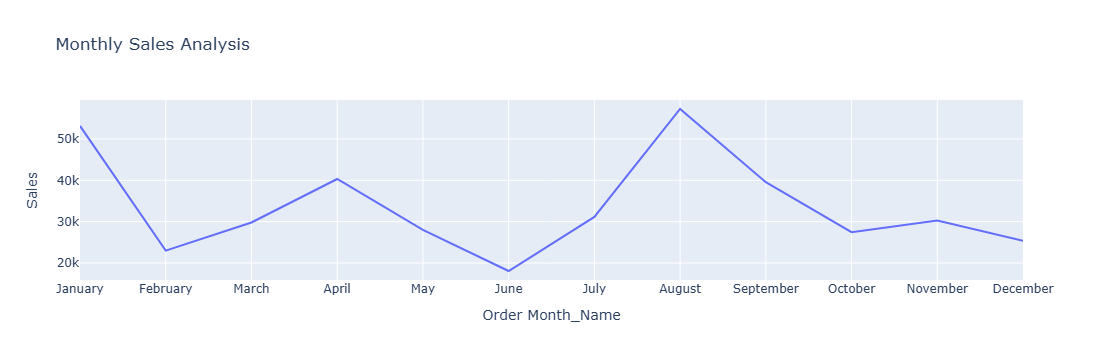

In [166]:
import plotly.express as px

# Group by both month number and name to keep sorting logic
sales_by_month_Name = df.groupby(['Order Month', 'Order Month_Name'])['Sales'].sum().reset_index()

# Sort by month number (integer column)
sales_by_month_Name = sales_by_month_Name.sort_values('Order Month')


# Plot
figure1 = px.line(
    sales_by_month_Name, 
    x='Order Month_Name', 
    y='Sales', 
    title='Monthly Sales Analysis'
)

figure1.show()


## Sales by Category [Technology, Furniture, Office Supply]

In [167]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Order Month', 'Order Month_Name', 'Order Year', 'Order Day of Week'],
      dtype='object')

In [168]:
sales_by_category = df.groupby('Category')['Sales'].sum().reset_index()
sales_by_category

,Category,Sales
0,Furniture,328908.8019
1,Office Supplies,325317.6220
2,Technology,404345.9990


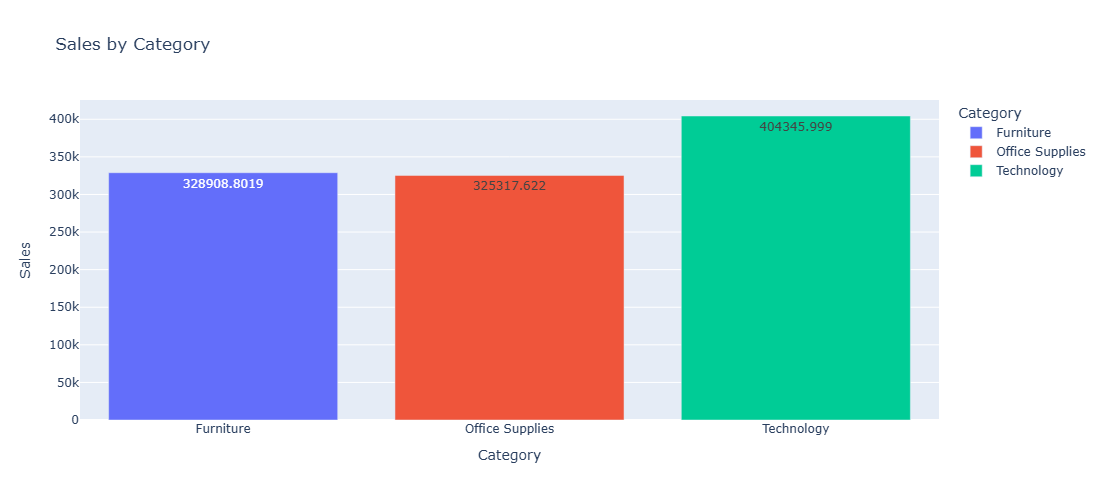

In [169]:
import plotly.express as px

fig = px.bar(
    sales_by_category,                 # Your dataframe
    x="Category",      # Column for x-axis
    y="Sales",      # Column for y-axis
    color = "Category",    # Optional: Color bars by category
    text = "Sales",
    title="Sales by Category",    # Optional: Title
height = 500)

fig.show()


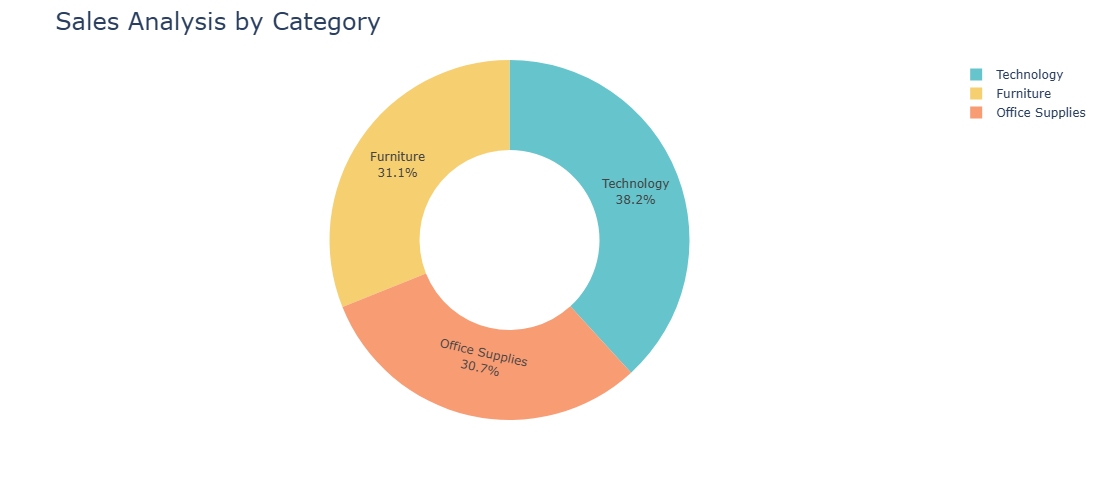

In [170]:
import plotly.express as px

fig1 = px.pie(
    sales_by_category, 
     values="Sales",
    names="Category",      
      hole = 0.5,
    color_discrete_sequence = px.colors.qualitative.Pastel)

fig1.update_traces(textposition = 'inside', textinfo = 'percent+label')
fig1.update_layout(title_text = 'Sales Analysis by Category', title_font = dict(size=24), width = 500, height = 500)

fig1.show()


## Monthly Profit of Company

In [171]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Month,Order Month_Name,Order Year,Order Day of Week
0,1,CA-2016-152156,2016-08-11,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Bookcases,Bush Somerset Collection Bookcase,261.9600,2.0,0.00,41.9136,8.0,August,2016.0,3.0
1,2,CA-2016-152156,2016-08-11,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3.0,0.00,219.5820,8.0,August,2016.0,3.0
2,3,CA-2016-138688,2016-12-06,NaT,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2.0,0.00,6.8714,12.0,December,2016.0,1.0
3,4,US-2015-108966,2015-11-10,NaT,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0,0.45,-383.0310,11.0,November,2015.0,1.0
4,5,US-2015-108966,2015-11-10,NaT,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Storage,Eldon Fold 'N Roll Cart System,22.3680,2.0,0.20,2.5164,11.0,November,2015.0,1.0


In [172]:
profit_by_month = df.groupby(['Order Month', 'Order Month_Name'])['Profit'].sum().reset_index()
profit_by_month

,Order Month,Order Month_Name,Profit
0,1.0,January,11128.5012
1,2.0,February,880.3183
2,3.0,March,3841.2877
3,4.0,April,994.8098
4,5.0,May,2801.3941
5,6.0,June,2705.2052
6,7.0,July,5604.7644
7,8.0,August,2522.2098
8,9.0,September,5504.1441
9,10.0,October,1723.3893


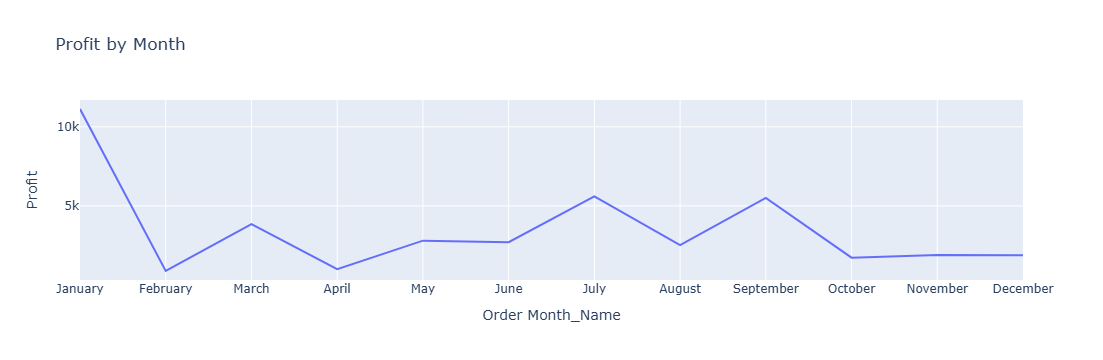

In [173]:
profit_by_month = profit_by_month.sort_values('Order Month')

figr = px.line(profit_by_month, x = 'Order Month_Name', y = 'Profit', title = 'Profit by Month')
figr.show()

## Profit by Category

In [174]:
profit_by_category = df.groupby('Category')['Profit'].sum().reset_index()
profit_by_category

,Category,Profit
0,Furniture,7907.8456
1,Office Supplies,53698.6292
2,Technology,57609.9799


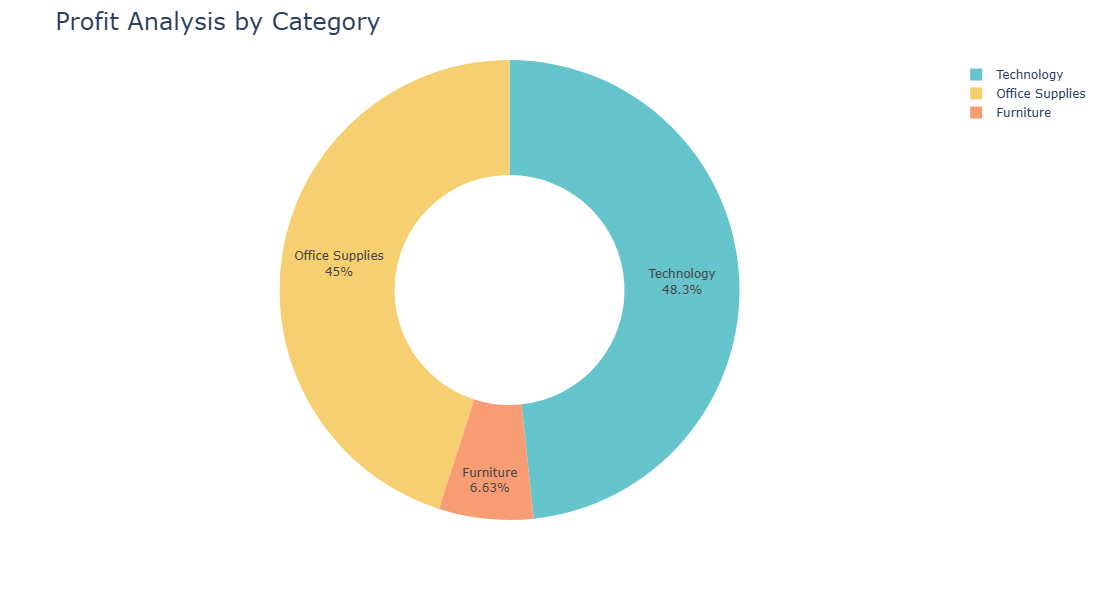

In [175]:
figure = px.pie(profit_by_category, values = 'Profit', names = 'Category', hole = 0.5,
               color_discrete_sequence = px.colors.qualitative.Pastel)

figure.update_traces(textposition = 'inside', textinfo = 'percent+label')
figure.update_layout(title_text = 'Profit Analysis by Category', 
                     title_font = dict(size = 24),
                    width = 600, height=600)

figure.show()

## Sales and Profit Analysis by Customer Segment

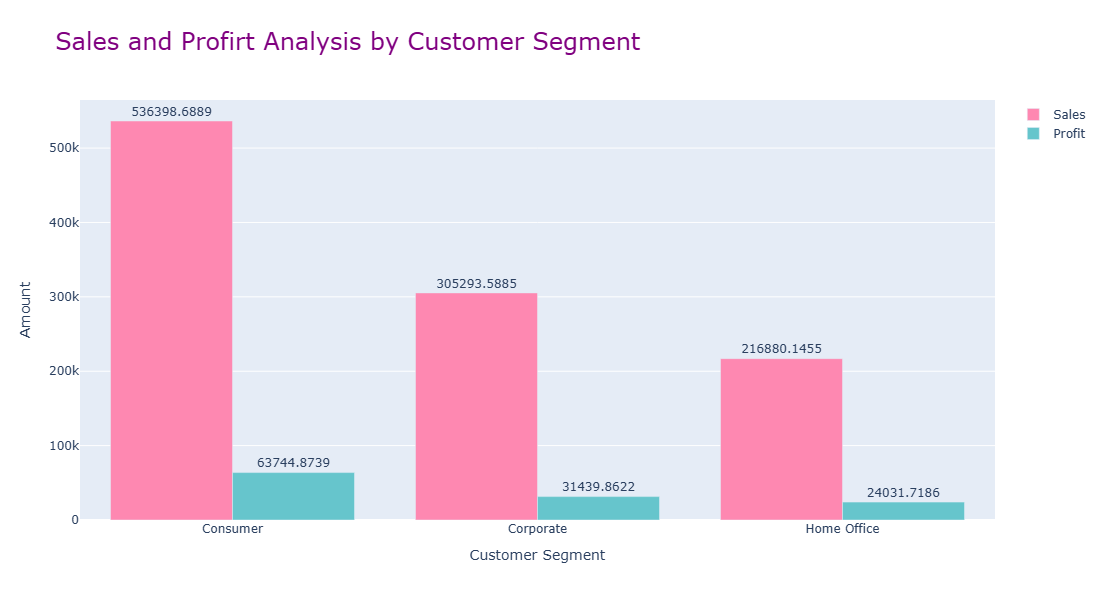

In [191]:
Sales_Profit_by_Customer_Segment = df.groupby('Segment').agg({'Sales' : 'sum', 'Profit' : 'sum'}).reset_index()

color_palette = px.colors.qualitative.Pastel

fig1 = go.Figure()

fig1.add_trace(go.Bar(x = Sales_Profit_by_Customer_Segment['Segment'], 
                      y = Sales_Profit_by_Customer_Segment['Sales'],
                      name = 'Sales', 
                      marker_color = color_palette[6],
                      text=Sales_Profit_by_Customer_Segment['Sales'],   # ✅ show values
                        textposition='outside' ))

fig1.add_trace(go.Bar(x = Sales_Profit_by_Customer_Segment['Segment'], 
                      y = Sales_Profit_by_Customer_Segment['Profit'],
                      name = 'Profit', 
                      marker_color = color_palette[0],
                      text=Sales_Profit_by_Customer_Segment['Profit'],   # ✅ show values
                        textposition='outside' ))

fig1.update_layout(title = 'Sales and Profirt Analysis by Customer Segment', title_font=dict(size=24, color='Purple'),
                   xaxis_title = 'Customer Segment', yaxis_title = 'Amount',
                  height = 600)

fig1.show()